In [1]:
import torch 
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets
from torchvision import transforms
from copy import deepcopy
import torch.optim as optim

from tqdm.notebook import tqdm 
import numpy as np

## Gradient Descent
Gradient Descent is a popular optimization algorithm used to find the minimum of a function. It works by taking small steps proportional to the negative gradient of the function. Here's a basic implementation:

In [2]:
def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(num_iters):
        h = np.dot(x, theta)
        loss = h - y
        gradient = np.dot(x.T, loss) / m
        theta -= alpha * gradient
    return theta

## Stochastic Gradient Descent
Stochastic Gradient Descent is a variation of Gradient Descent that randomly selects a subset of the training data to compute the gradient. This can be more efficient for large datasets. Here's a basic implementation:

\begin{equation*}

w_{t+1} = w_t - \eta \nabla f_i(w_t)

\end{equation*}

In [3]:
def stochastic_gradient_descent(x, y, theta, alpha, num_epochs, batch_size):
    m = len(y)
    num_batches = m // batch_size
    for epoch in range(num_epochs):
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            batch_x = x[start_idx:end_idx]
            batch_y = y[start_idx:end_idx]
            h = np.dot(batch_x, theta)
            loss = h - batch_y
            gradient = np.dot(batch_x.T, loss) / batch_size
            theta -= alpha * gradient
    return theta

## Adam
Adam is an adaptive learning rate optimization algorithm commonly used in deep learning. It combines ideas from both Adagrad and RMSProp. Here's a basic implementation:

\begin{align*}

m_{t+1} &= \beta_1 m_t + (1 - \beta_1) g_t \\

v_{t+1} &= \beta_2 v_t + (1 - \beta_2) g_t^2 \\

\hat{m}_{t+1} &= \frac{m_{t+1}}{1 - \beta_1^{t+1}} \\

\hat{v}_{t+1} &= \frac{v_{t+1}}{1 - \beta_2^{t+1}} \\

w_{t+1} &= w_t - \eta \frac{\hat{m}_{t+1}}{\sqrt{\hat{v}_{t+1}} + \epsilon}

\end{align*}

In [4]:
def adam(x, y, theta, alpha, beta1, beta2, eps, num_iters):
    m = len(y)
    mo = np.zeros(theta.shape)
    v = np.zeros(theta.shape)
    for i in range(num_iters):
        h = np.dot(x, theta)
        loss = h - y
        gradient = np.dot(x.T, loss) / m
        mo = beta1 * mo + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        mo_corrected = mo / (1 - beta1 ** (i + 1))
        v_corrected = v / (1 - beta2 ** (i + 1))
        theta -= alpha * mo_corrected / (np.sqrt(v_corrected) + eps)
    return theta

### The Dataset
We will use the MNIST dataset, which contains images of handwritten digits. Our goal is to classify the digits correctly. We will use the PyTorch library to load and preprocess the data:

In [8]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST(root='./MNIST', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

TimeoutError: [Errno 60] Operation timed out

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### Gradient Descent

Gradient Descent is an optimization algorithm that updates the weights by taking small steps proportional to the negative gradient of the cost function. Here's an implementation:

In [7]:
net_sgd = Net()
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(net_sgd.parameters(), lr=0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_sgd.zero_grad()
        outputs = net_sgd(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_sgd.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(trainloader)}")

Epoch 1 - Training loss: 0.751909927486865
Epoch 2 - Training loss: 0.36919543051770504
Epoch 3 - Training loss: 0.32457284221072186
Epoch 4 - Training loss: 0.2984010190693046
Epoch 5 - Training loss: 0.2784049235014265
Epoch 6 - Training loss: 0.2595501922245727
Epoch 7 - Training loss: 0.24275317413212139
Epoch 8 - Training loss: 0.2260771152466091
Epoch 9 - Training loss: 0.21193756982842996
Epoch 10 - Training loss: 0.19857726572577888


#### Adam

Adam is an optimization algorithm that uses a combination of the momentum and the RMSProp algorithms to update the weights. Here's an implementation:

In [8]:
net_adam = Net()
criterion = nn.CrossEntropyLoss()
optimizer_adam = optim.Adam(net_adam.parameters(), lr=0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_adam.zero_grad()
        outputs = net_adam(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adam.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(trainloader)}")

Epoch 1 - Training loss: 0.39829621126434445
Epoch 2 - Training loss: 0.27143309249091885
Epoch 3 - Training loss: 0.2526377979944001
Epoch 4 - Training loss: 0.24488185862027634
Epoch 5 - Training loss: 0.23214142563254403
Epoch 6 - Training loss: 0.22182837139362338
Epoch 7 - Training loss: 0.2308436732129581
Epoch 8 - Training loss: 0.2201322489011008
Epoch 9 - Training loss: 0.22064448215329507
Epoch 10 - Training loss: 0.22146882209231827


### Comparing the Results
Now that we've trained our neural network using these four optimization algorithms, let's compare their performance on the test set:

In [9]:
def evaluate(net, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

print(f"Accuracy (SGD): {evaluate(net_sgd, testloader)}")
print(f"Accuracy (Adam): {evaluate(net_adam, testloader)}")

Accuracy (SGD): 0.9436
Accuracy (Adam): 0.9389


## Transformation

#### Different types of transformation can be applied to a an image.
- resize 
- RandomRotation
- normalize 
- Pad
- Lambda 
- etc (https://pytorch.org/vision/0.9/transforms.html)

In [6]:
transformation = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.RandomRotation(90), 
    transforms.ToTensor(),
])

## Dataset 
- Why there exists train, validation and test sets?

<img src="https://cdn.shortpixel.ai/spai/q_lossy+w_806+to_webp+ret_img/algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png" alt="Train validation test split" width="600" height="300">

In [7]:
mnist_tr_set = datasets.MNIST(root='./MNIST', train=True, download=True, transform=transformation)
mnist_ts_set = datasets.MNIST(root='./MNIST', train=False, download=True, transform=transformation)

In [15]:
mnist_tr_set[0][0].shape

torch.Size([1, 28, 28])

In [8]:
mnist_tr_set, mnist_vl_set = random_split(mnist_tr_set, [0.8,0.2])

In [9]:
len(mnist_tr_set), len(mnist_vl_set), len(mnist_ts_set)

(48000, 12000, 10000)

## DatLoader

- What is DataLoader ? 
- Importance of batch size 

<img src="https://drek4537l1klr.cloudfront.net/stevens2/Figures/CH07_F14_Stevens2_GS.png" alt="Dataset and Dataloader" width="900" height="200">

In [10]:
batch_size = 64

train_dl = DataLoader(mnist_tr_set, batch_size=batch_size, shuffle=True)
validation_dl = DataLoader(mnist_vl_set, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(mnist_ts_set, batch_size=batch_size, shuffle=True)

## Evaluation

In [11]:
@torch.no_grad()
def evaluation(model, loss_module, val_dl, device):
    model.eval()
    evl_loss = 0
    for x, y in val_dl:
        x = x.to(device)
        y = y.to(device)
        y_ht = model(x)
        loss = loss_module(y_ht, y)
        evl_loss += loss.item()
    evl_loss /= len(val_dl)
    return evl_loss

## Training

In [16]:
def training(model, loss_module, optimizer, train_dl, val_dl, num_epochs, device, scheduler=None):
    epochs_trian_loss = []
    epochs_val_loss = []

    pbar = tqdm(range(num_epochs))
    for _ in pbar:
        #Defining the mode of the model (if its validation mode it doesnt calculate the gradient)
        model.train()
        avgLoss = 0
        for x, y in train_dl:
            # transfering images and their labels to the gpu memory 
            x = x.to(device) 
            y = y.to(device)

            y_ht = model(x)
            
            loss = loss_module(y_ht, y)

            # Set preciously calculated gradients to zero for everysingle parameter
            optimizer.zero_grad()
            
            # Back propagate the gradient through the network and free the outputs of each layer
            loss.backward()
            # Update parameters 
            optimizer.step()

            avgLoss += loss.item()

        avgLoss /= len(train_dl)

        if scheduler:
            scheduler.step(avgLoss)
            
        epochs_trian_loss.append(avgLoss)
        epochs_val_loss.append(evaluation(model, loss_module, val_dl, device))
        pbar.set_description(f"Loss is : [{avgLoss}]")
        
    return model, epochs_trian_loss, epochs_val_loss

### Model definition

In [21]:
class mlp(nn.Module): #1,28,28
    def __init__(self, img_size, num_channels, hidden_dim, num_classes):
        super().__init__()
        self.l1 = nn.Linear(num_channels*img_size*img_size, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

        self.relu = nn.ReLU()
        self.selu = nn.SELU()
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x): # <B, C, H, W>
        B = x.shape[0] 
        x = x.view((B, -1))
        h = self.l1(x)
        h = self.relu(h)
        h = self.l2(h)
        h = self.relu(h)
        h = self.l3(h)
        h = self.selu(h)
        proba = self.softmax(self.classifier(h))
        return proba

### A function to calculate accuracy

In [22]:
def calculate_accuracy(predictions, labels):
    predicted_labels = torch.argmax(predictions, dim=1)
    correct_predictions = torch.eq(predicted_labels, labels).sum().item()
    accuracy = correct_predictions / labels.size(0)
    return accuracy

@torch.no_grad()
def Accuracy(model, dataloader):
    model.eval()
    accuracy = 0 
    for x, y in dataloader:
        x = x.to(device)
        y = y.to(device)
        y_hat = model(x)
        accuracy += calculate_accuracy(y_hat, y)
    accuracy = accuracy / len(dataloader)
    return accuracy

## Device 

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [27]:
img_wdth = 28
hid_dim = 256
num_channels = 1
num_classes = 10


In [28]:
model = mlp(img_wdth, num_channels, hid_dim, num_classes)
model.to(device)
model

mlp(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=256, bias=True)
  (classifier): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
  (selu): SELU()
  (softmax): Softmax(dim=-1)
)

## Importance of learning rate

In [35]:
lr = 1
num_epochs = 20
loss_module = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [36]:
model, epochs_trian_loss, epochs_val_loss = training(model, loss_module, optimizer, train_dl, validation_dl, num_epochs, device)

  0%|          | 0/20 [00:00<?, ?it/s]

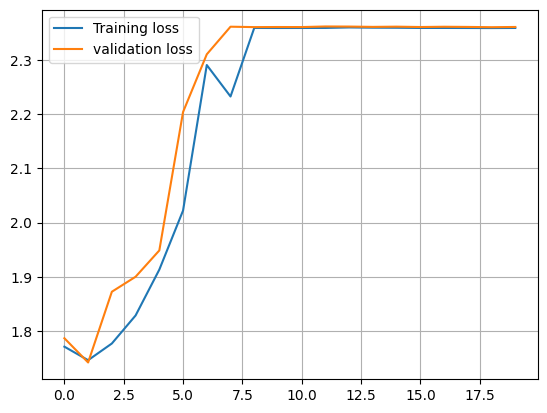

In [37]:
plt.plot(epochs_trian_loss, label="Training loss")
plt.plot(epochs_val_loss, label="validation loss")
plt.legend()
plt.grid(True)

In [38]:
Accuracy(model, validation_dl)

0.10031582446808511

In [39]:
model = mlp(img_wdth, num_channels, hid_dim, num_classes)
model.to(device)
model

mlp(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=256, bias=True)
  (classifier): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
  (selu): SELU()
  (softmax): Softmax(dim=-1)
)

## Different types of learning rate scheduler
- StepLR
- CyclicLR
- ReduceLROnPlateau
- etc (https://pytorch.org/docs/stable/optim.html)


In [40]:
lr = 1e-2
loss_module = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

- ReduceLROnPlateau

In [42]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.4, patience=2, verbose=True)

In [43]:
model, epochs_trian_loss, epochs_val_loss = training(model, loss_module, optimizer, train_dl, validation_dl, num_epochs, device, scheduler)

  0%|          | 0/20 [00:00<?, ?it/s]

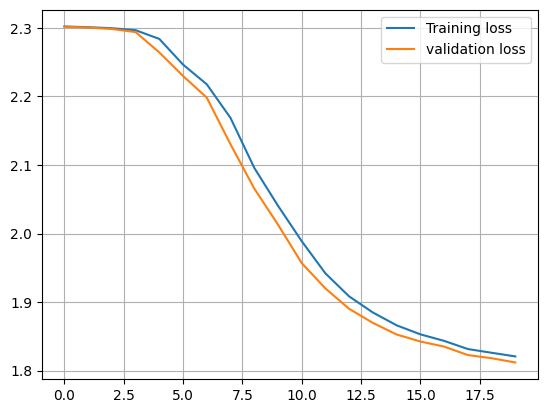

In [44]:
plt.plot(epochs_trian_loss, label="Training loss")
plt.plot(epochs_val_loss, label="validation loss")
plt.legend()
plt.grid(True)

In [45]:
Accuracy(model, validation_dl)

0.6624833776595744

### How to overcome overfitting? 
- early stopping
- regularization terms
- data augmentation
- etc

### What are L1 and L2 regularization ?

<img src="https://www.researchgate.net/profile/Nibaran-Das/publication/355020694/figure/fig2/AS:1106343318560770@1640784210609/Parameter-norm-penalties-L2-norm-regularization-left-and-L1-norm-regularization.ppm" alt="Regularization" width="700" height="300">

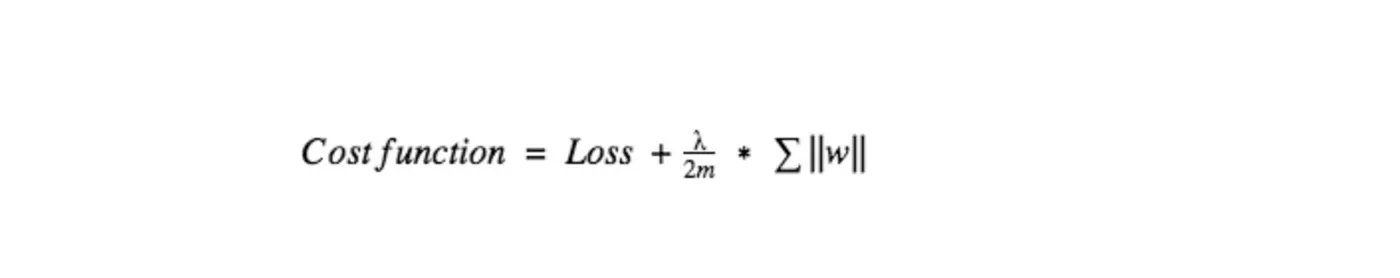

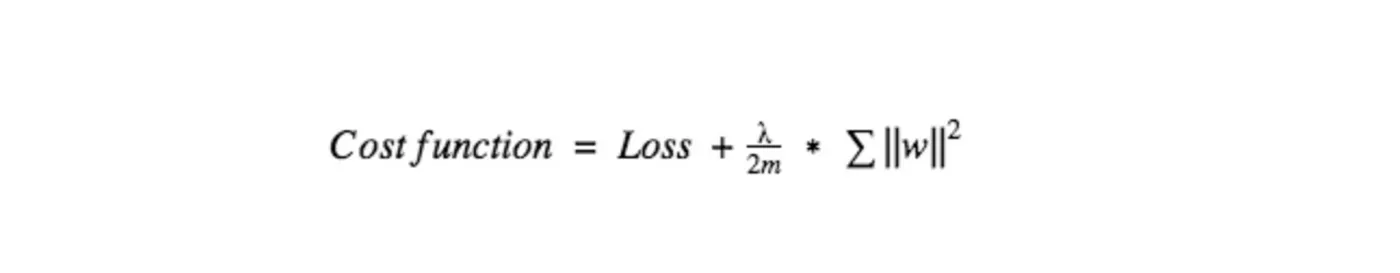

In [46]:
def training(model, loss_module, optimizer, train_dl, val_dl, num_epochs, device, lmbda, norm_type:int, scheduler=None):
    epochs_trian_loss = []
    epochs_val_loss = []

    pbar = tqdm(range(num_epochs))
    for _ in pbar:
        #Defining the mode of the model (if its validation mode it doesnt calculate the gradient)
        model.train()
        avgLoss = 0
        for x, y in train_dl:
            # transfering images and their labels to the gpu memory 
            x = x.to(device) 
            y = y.to(device)

            y_ht = model(x)
            
            loss = loss_module(y_ht, y)

            l1_loss = torch.tensor(0., device=device)
            for param in model.parameters():
                l1_loss += torch.norm(param, norm_type)
            loss += lmbda * l1_loss

            # Set preciously calculated gradients to zero for everysingle parameter
            optimizer.zero_grad()
            # Back propagate the gradient through the network and free the outputs of each layer
            loss.backward()
            # Update parameters 
            optimizer.step()

            avgLoss += loss.item()

        avgLoss /= len(train_dl)

        if scheduler:
            scheduler.step(avgLoss)
            
        epochs_trian_loss.append(avgLoss)
        epochs_val_loss.append(evaluation(model, loss_module, val_dl, device))
        pbar.set_description(f"Loss is : [{avgLoss}]")
        
    return model, epochs_trian_loss, epochs_val_loss

In [47]:
model = mlp(img_wdth, num_channels, hid_dim, num_classes)
model.to(device)
model

mlp(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=256, bias=True)
  (classifier): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
  (selu): SELU()
  (softmax): Softmax(dim=-1)
)

In [48]:
lr = 1e-3
num_epochs = 50
norm_type = 2
lmbda = 0.005
loss_module = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [50]:
model, epochs_trian_loss, epochs_val_loss = training(model, loss_module, optimizer, train_dl, validation_dl, num_epochs, device, lmbda, norm_type)

  0%|          | 0/50 [00:00<?, ?it/s]

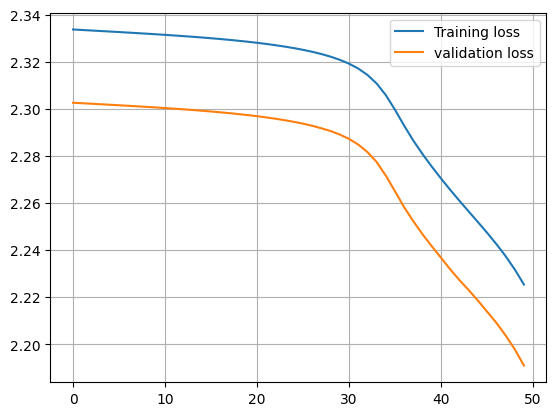

In [53]:
plt.plot(epochs_trian_loss, label="Training loss")
plt.plot(epochs_val_loss, label="validation loss")
plt.legend()
plt.grid(True)

In [52]:
Accuracy(model, validation_dl)

0.47647938829787234

- Early stopping 

In [18]:
def training(model, loss_module, optimizer, train_dl, val_dl, num_epochs, device, early_trs, scheduler=None):
    epochs_trian_loss = []
    epochs_val_loss = []

    counter = 0
    best_loss = 100000
    best_model = deepcopy(model)

    pbar = tqdm(range(num_epochs))
    for _ in pbar:
        #Defining the mode of the model (if its validation mode it doesnt calculate the gradient)
        model.train()
        avgLoss = 0
        for x, y in train_dl:
            # transfering images and their labels to the gpu memory 
            x = x.to(device) 
            y = y.to(device)

            y_ht = model(x)
            
            loss = loss_module(y_ht, y)

            # Set preciously calculated gradients to zero for everysingle parameter
            optimizer.zero_grad()
            # Back propagate the gradient through the network and free the outputs of each layer
            loss.backward()
            # Update parameters 
            optimizer.step()

            avgLoss += loss.item()

        avgLoss /= len(train_dl)
        if scheduler:
            scheduler.step(avgLoss)
        epochs_trian_loss.append(avgLoss)
        epochs_val_loss.append(evaluation(model, loss_module, val_dl, device))

        #Early stopping part 
        if epochs_val_loss[-1] <= best_loss:
            best_loss = epochs_val_loss[-1]
            counter = 0
            best_model = deepcopy(model)
        else :
            counter += 1
            if counter % early_trs == 0:
                break
            
        
        pbar.set_description(f"Loss is : [{avgLoss}]")
        
    return best_model, epochs_trian_loss, epochs_val_loss

In [27]:
model = mlp(img_wdth, num_channels, hid_dim, num_classes)
model.to(device)
model

mlp(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=256, bias=True)
  (classifier): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
  (selu): SELU()
  (softmax): Softmax(dim=-1)
)

In [28]:
threshhold = 3
lr = 1e-2

loss_module = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [29]:
model, epochs_trian_loss, epochs_val_loss = training(model, loss_module, optimizer, train_dl, validation_dl, num_epochs, device, threshhold)

  0%|          | 0/20 [00:00<?, ?it/s]

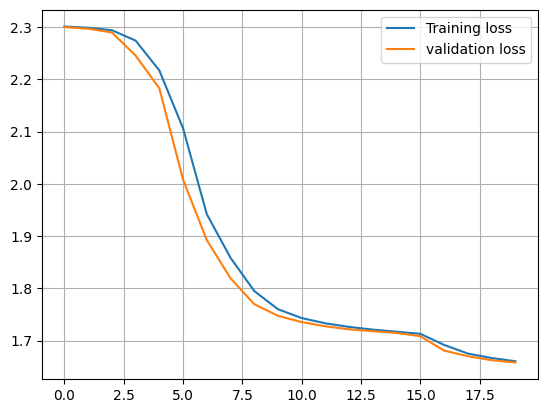

In [30]:
plt.plot(epochs_trian_loss, label="Training loss")
plt.plot(epochs_val_loss, label="validation loss")
plt.legend()
plt.grid(True)

In [31]:
Accuracy(model, validation_dl)

0.816156914893617